<a href="https://colab.research.google.com/github/fall-blue/IRIS-Project/blob/main/IRIS_Object_Detection_Development_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **IRIS OBJECT DETECTION DEVELOPMENT CODE**
Our YOLOv8 object detection model is currently trained to recognize the following objects:
*   Chairs
*   Sofas
*   Tables
*   Fireplaces

(NOTE: If you want to test it out, we have submitted another colab notebook with all the necessary instructions)

**DISCLAIMER: this is just a prototype and the model is still in development we are actively working on expanding our dataset to incorporate more object classes, enhancing the model's versatility, performance and accuracy.**



### **Setting Up Dependencies and Importing Data**

In [ ]:
!nvidia-smi

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.1/78.2 GB disk)


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="QyElNXDADcwm7QlE53Ps")
project = rf.workspace("sva-gldvc").project("living-room-pg2pg")
dataset = project.version(3).download("yolov8")

mkdir: cannot create directory ‘{HOME}/datasets’: No such file or directory
[Errno 2] No such file or directory: '{HOME}/datasets'
/content
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to living-room-3 in yolov8:: 100%|██████████| 528/528 [00:00<00:00, 4674.18it/s]


### **OBJECT DETECTION MODEL TRAINING**

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

[Errno 2] No such file or directory: '{HOME}'
/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/living-room-3/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, 

In [ ]:
from IPython.display import Image

/content/living-room-3


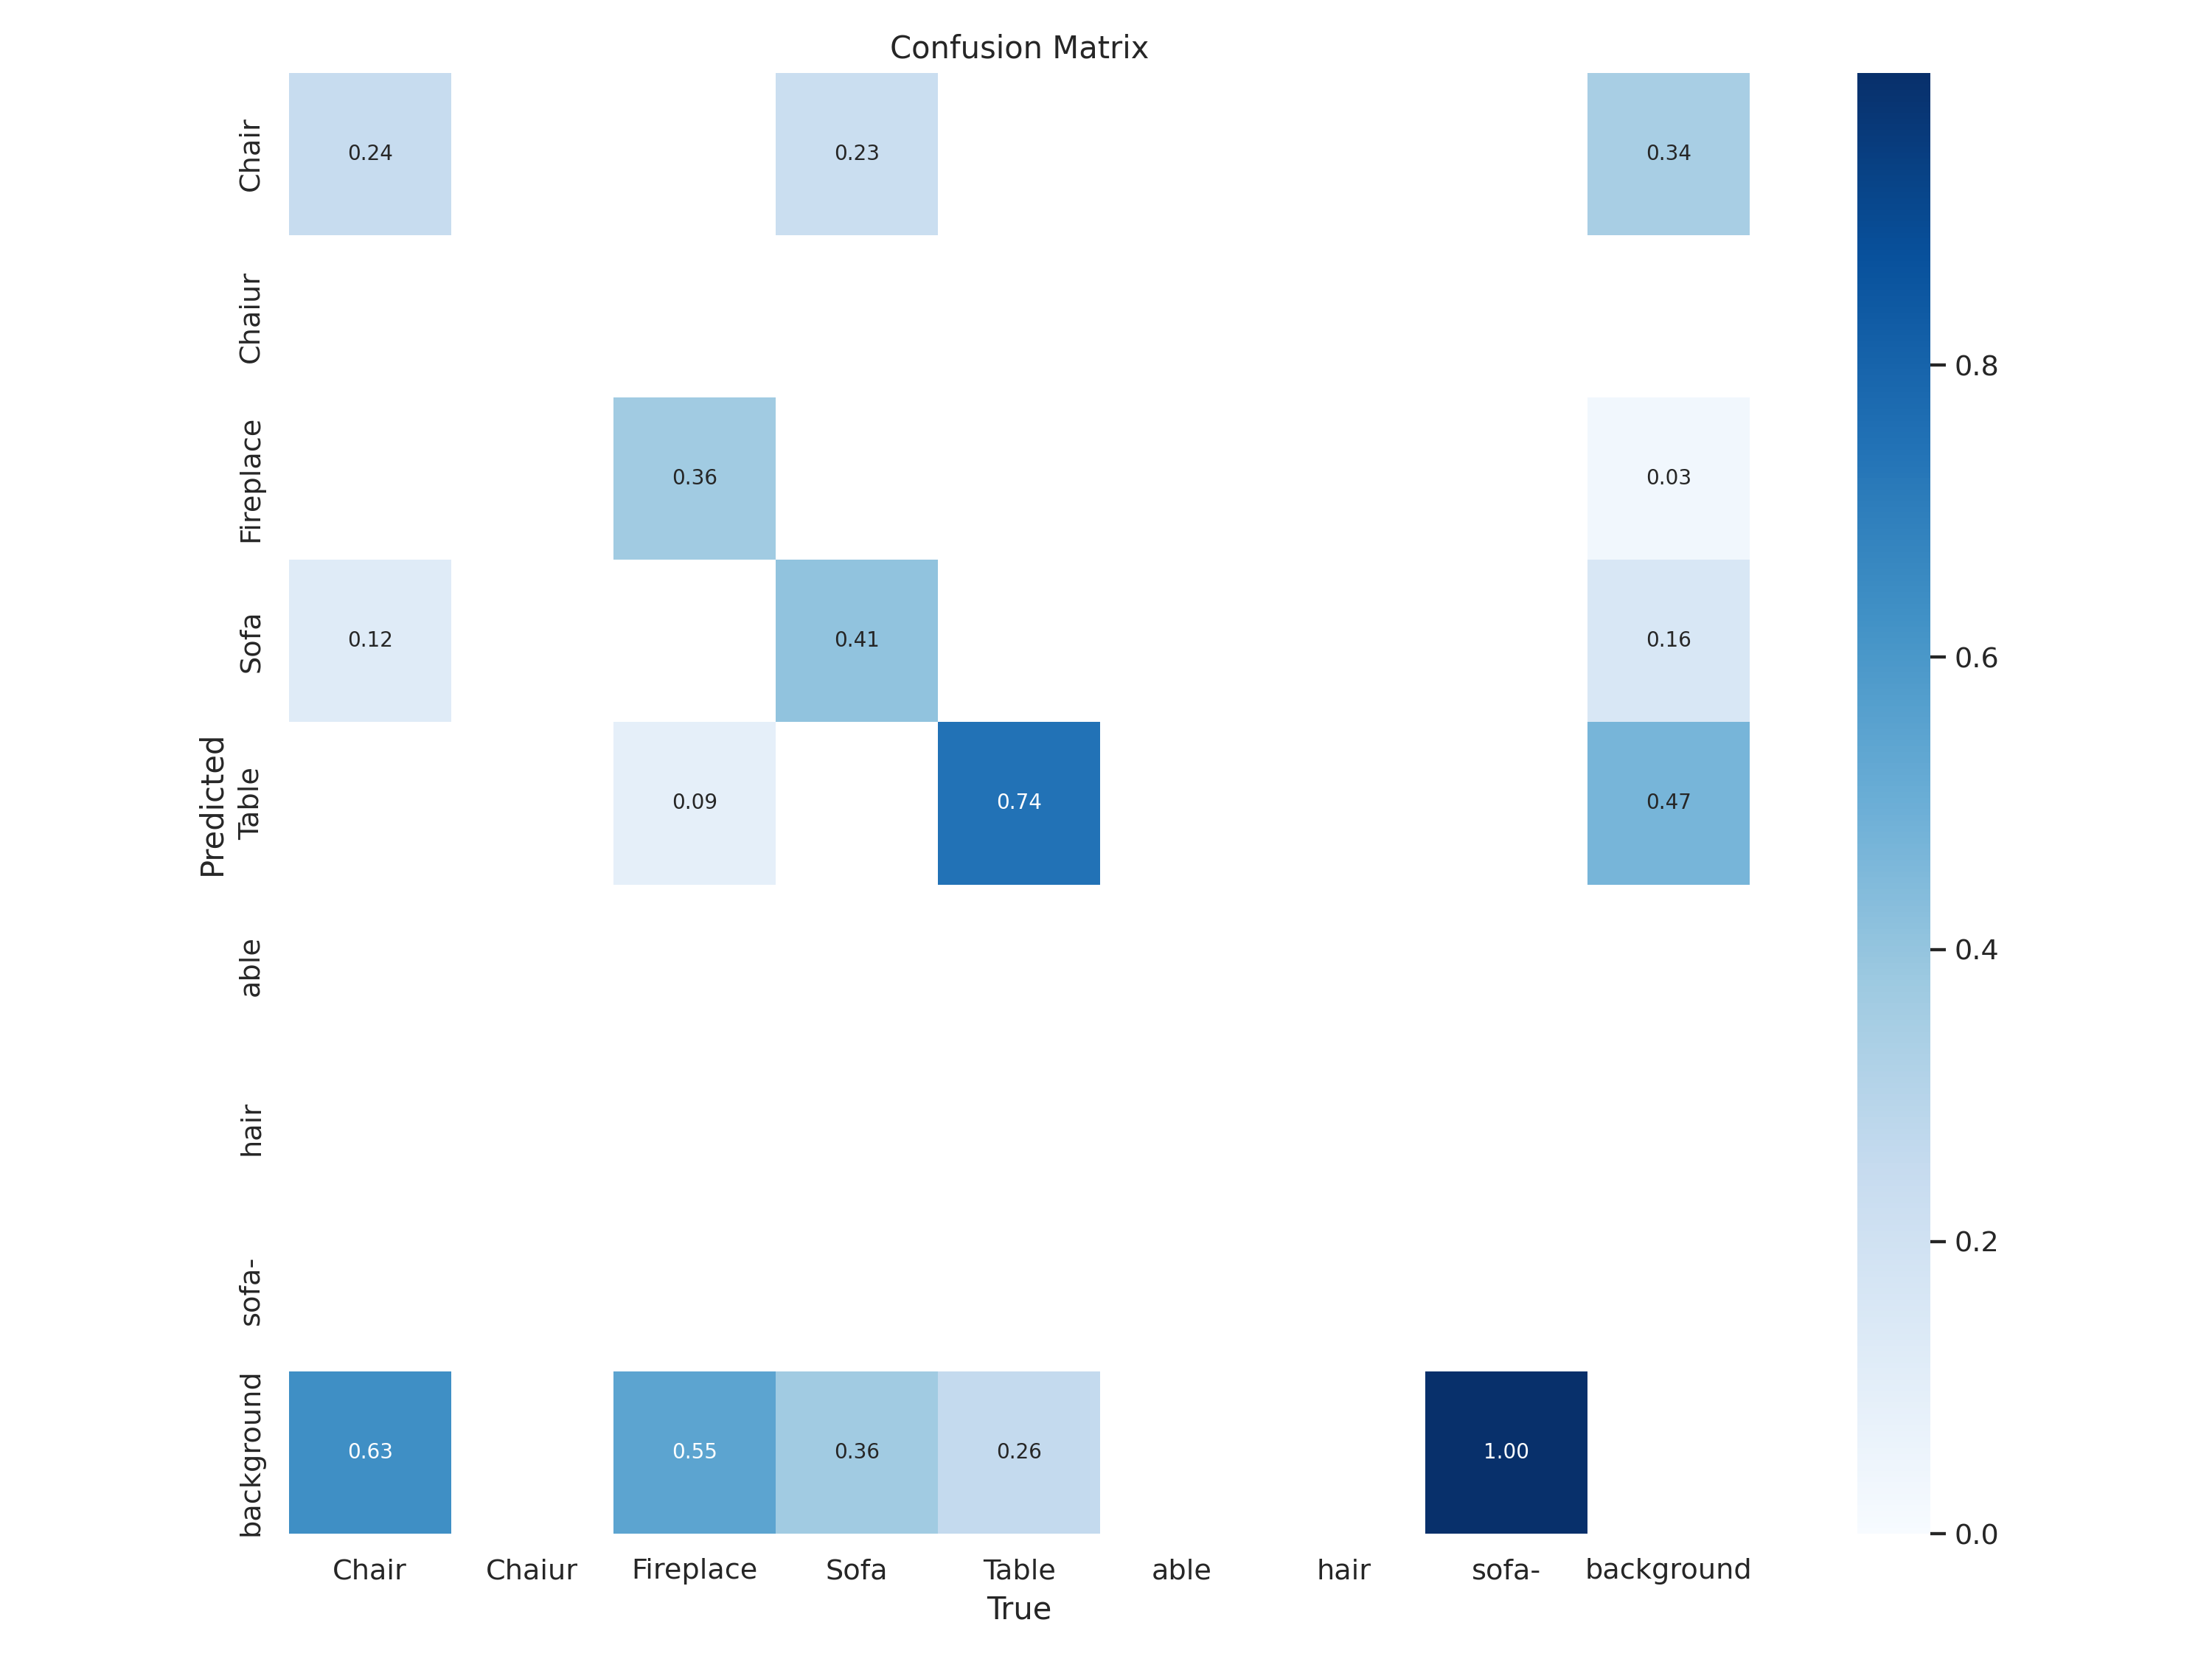

In [ ]:
%cd {HOME}
Image(filename=f'/content/runs/detect/train9/confusion_matrix.png', width=600)


/content/living-room-3


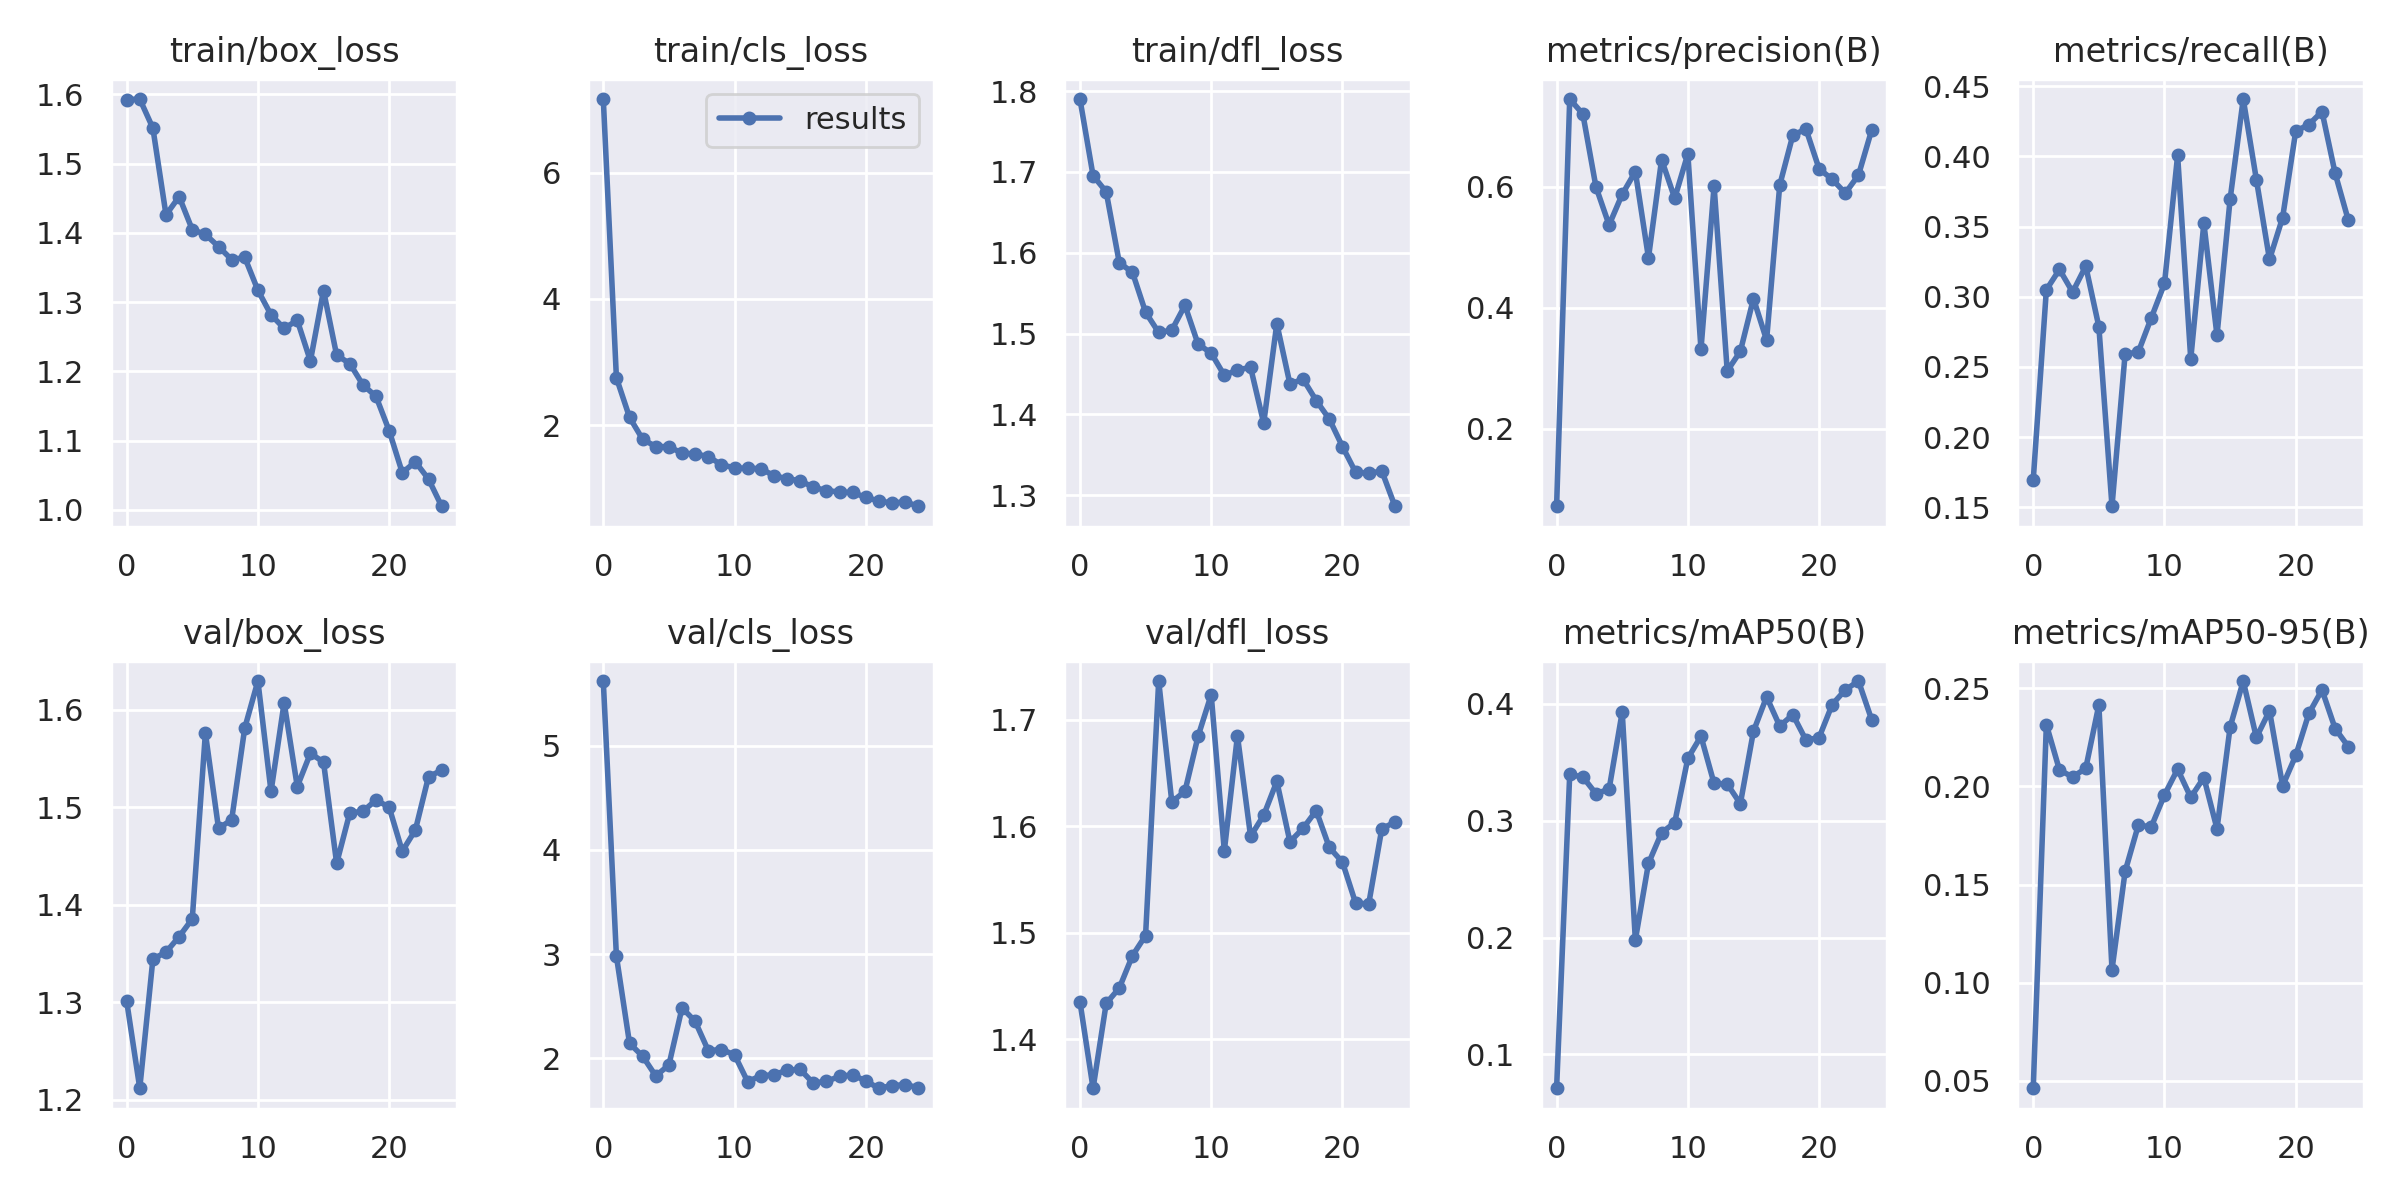

In [ ]:
%cd {HOME}
Image(filename=f'/content/runs/detect/train9/results.png', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model=/content/runs/detect/train9/weights/best.pt data={dataset.location}/data.yaml

/content/living-room-3
2023-10-23 05:14:16.661151: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-23 05:14:17.844453: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/living-room-3/valid/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100% 30/30 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 3, len(boxes) = 110. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-se

### **Testing the model on a few sample images and videos**

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train9/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content/living-room-3
2023-10-23 05:14:49.802781: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-23 05:14:51.056616: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs
image 1/28 /content/living-room-3/test/images/sun_aceqhbugfutufqee-1-_jpg.rf.e3b456f2e2bc3411fae26aea23b4252d.jpg: 800x800 1 Table, 24.7ms
image 2/28 /content/living-room-3/test/images/sun_acffspenlmqtbbha-1-_jpg.rf.512e9e83b43e325ba3bd5f5051191019.jpg: 800x800 24.7ms
image 3/28 /content/living-room-3/test/images/sun_acgjjumjehdvwzdq-1-_jpg.rf.f98d8a8d00c4e9d62b124bd6c7e

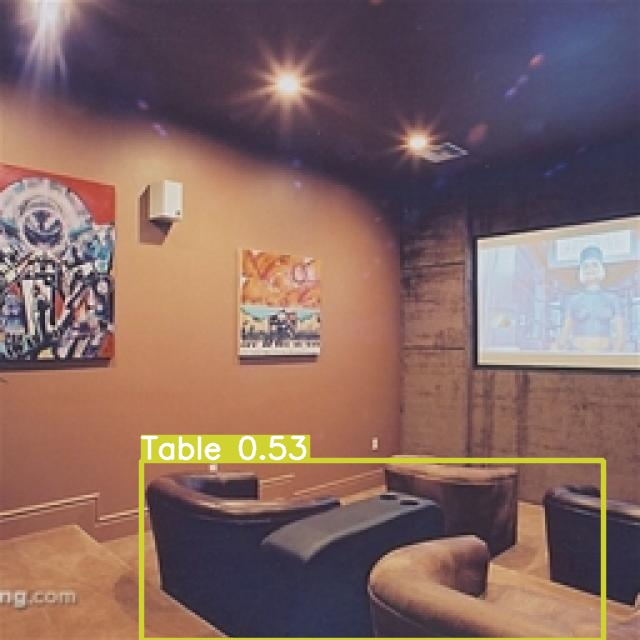

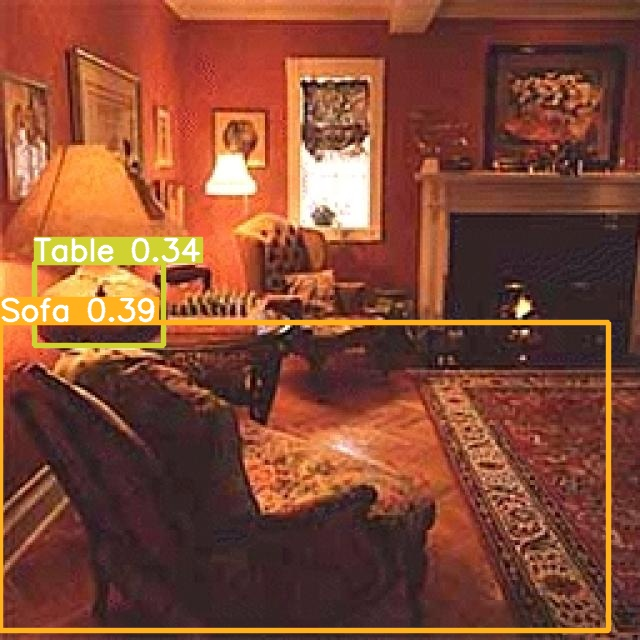

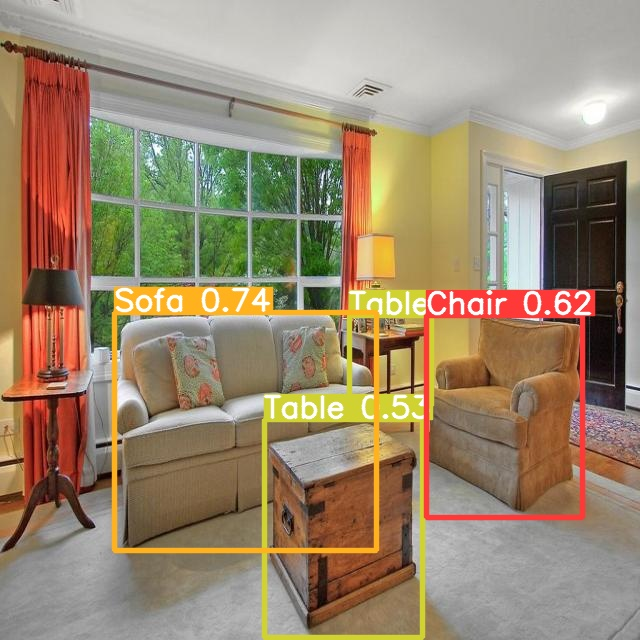

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train9/weights/best.pt conf=0.25 source='/content/Sample Dataset/production_id_3769951 (1080p).mp4' save=True
